In [1]:
import os
os.getcwd( )

'/Users/alpereny/Desktop'

In [2]:
#Installing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#creating random 1000 variables 
trained = np.random.rand(1000)
new = np.random.rand(1000)

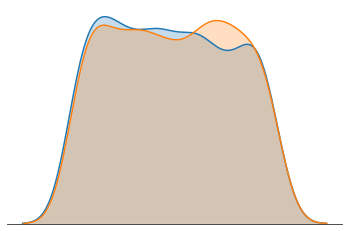

In [4]:
#Overlaying two datasets 
sns.set_style("white")
plot = sns.kdeplot(trained, shade=True)
plot = sns.kdeplot(new, shade=True)
plot.set(yticklabels=[], xticklabels = [])
sns.despine(left=True)

In [11]:
#Binning Formula
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

#Creating Breakpoints
buckets = 10
raw_breakpoints = np.arange(0, buckets + 1) / (buckets) * 100
breakpoints = scale_range(raw_breakpoints, np.min(trained), np.max(trained))

In [51]:
print(raw_breakpoints)

[6.68412e-04 1.00326e-01 1.99983e-01 2.99641e-01 3.99299e-01 4.98956e-01
 5.98614e-01 6.98271e-01 7.97929e-01 8.97586e-01 9.97244e-01]


In [42]:
print(breakpoints)

[6.68412e-04 1.00326e-01 1.99983e-01 2.99641e-01 3.99299e-01 4.98956e-01
 5.98614e-01 6.98271e-01 7.97929e-01 8.97586e-01 9.97244e-01]


In [43]:
#distribution of values on breakpoints
initial_counts = np.histogram(trained, breakpoints)[0]
new_counts = np.histogram(new, breakpoints)[0]

In [44]:
#Creating Dataframe with findings
df = pd.DataFrame({'Bucket': np.arange(1, 11), 'Breakpoint Value':breakpoints[1:],
                   'trained Count':initial_counts, 'New Count':new_counts})
    
df['trained Percent'] = df['trained Count'] / len(trained)
df['New Percent'] = df['New Count'] / len(new)
df

,Bucket,Breakpoint Value,trained Count,New Count,trained Percent,New Percent
0,1,0.10,118,107,0.12,0.11
1,2,0.20,112,111,0.11,0.11
2,3,0.30,100,93,0.10,0.09
3,4,0.40,91,106,0.09,0.11
4,5,0.50,108,94,0.11,0.09
5,6,0.60,96,87,0.10,0.09
6,7,0.70,97,111,0.10,0.11
7,8,0.80,86,101,0.09,0.10
8,9,0.90,97,90,0.10,0.09
9,10,1.00,95,98,0.10,0.10


In [46]:
#Calculating PSI
df['PSI'] = (df['New Percent'] - df['trained Percent']) * np.log(df['New Percent'] / df['trained Percent'])

np.sum(df['PSI'])

0.011628390253638023

In [47]:
df.head()

,Bucket,Breakpoint Value,trained Count,New Count,trained Percent,New Percent,PSI
0,1,0.10,118,107,0.12,0.11,0.00
1,2,0.20,112,111,0.11,0.11,0.00
2,3,0.30,100,93,0.10,0.09,0.00
3,4,0.40,91,106,0.09,0.11,0.00
4,5,0.50,108,94,0.11,0.09,0.00


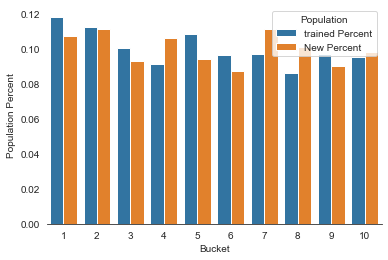

In [48]:
#Comparing population percents over buckets 
percents = df[['trained Percent', 'New Percent', 'Bucket']] \
             .melt(id_vars=['Bucket']) \
             .rename(columns={'variable':'Population', 'value':'Percent'})
             
    
percents.head()


p = sns.barplot(x="Bucket", y="Percent", hue="Population", data=percents)
p.set(xlabel='Bucket', ylabel='Population Percent')
sns.despine(left=True)